In [1]:
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
DATA_PATH = "../data/extracted/housing/"
DATA_FILE = "housing.csv"
FULL_PATH = DATA_PATH + DATA_FILE

In [3]:
# Read the CSV file into a data frame
data = pd.read_csv(FULL_PATH)

In [4]:
# Get information about our dataframe
data.head(10)
data.info()
headers = list(data)
print(headers)

data["ocean_proximity"]
data["ocean_proximity"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

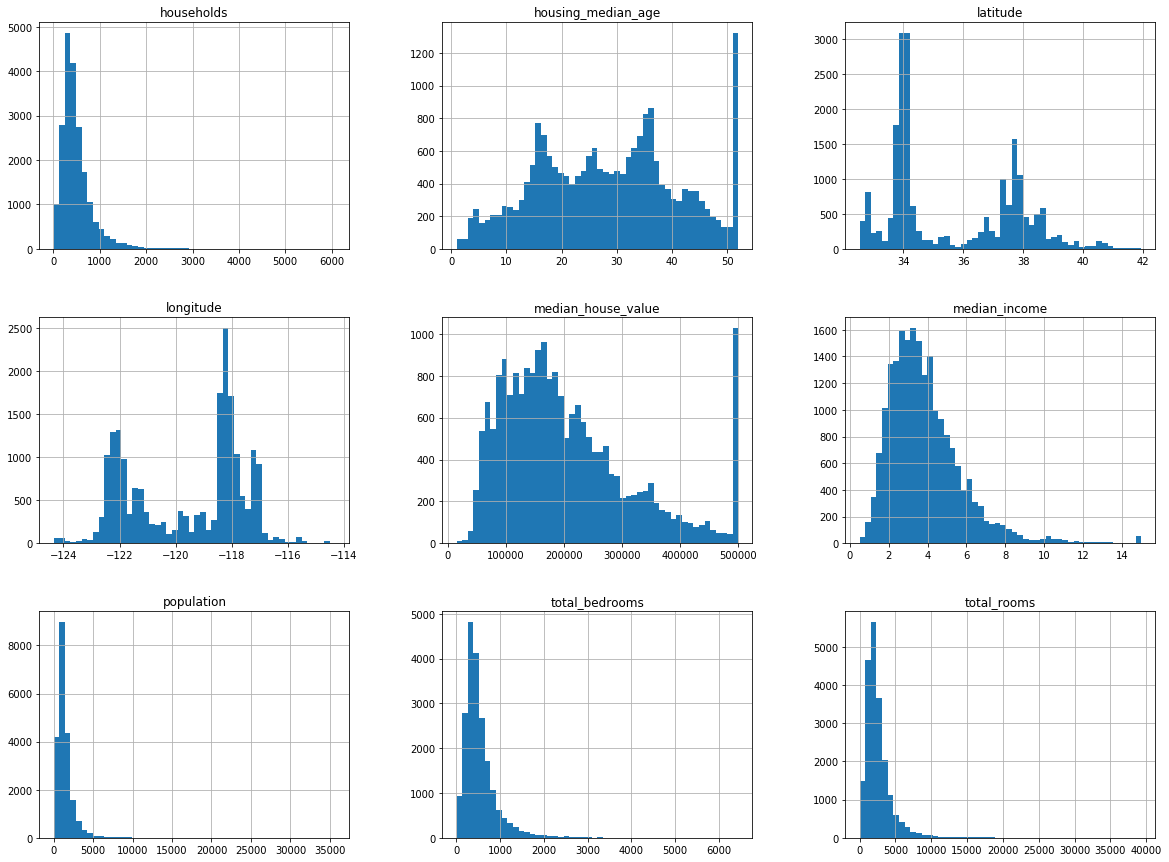

In [5]:
# Get some basic statistics and plots
data.describe()
data.hist(bins=50, figsize=(20, 15))
plt.show()
# plt.savefig('./images/scikit04.png',dpi=500)

In [6]:
# Create a test set
def splitTrain(data, ratio):
    ixShuffle = np.random.permutation(len(data))
    testSetSize = int(len(data) * ratio)
    ixTest = ixShuffle[:testSetSize]
    ixTrain = ixShuffle[testSetSize:]
    return (data.iloc[ixTrain], data.iloc[ixTest])

(train,test) = splitTrain(data, .05)
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19522,-121.00,37.65,17.0,484.0,202.0,198.0,204.0,0.6825,187500.0,INLAND
20330,-119.03,34.25,25.0,3344.0,502.0,1483.0,496.0,6.1960,340600.0,<1H OCEAN
8655,-118.42,33.85,43.0,1584.0,477.0,799.0,433.0,5.0322,435000.0,NEAR OCEAN
10303,-117.79,33.88,17.0,8562.0,1351.0,3822.0,1316.0,6.0829,252600.0,<1H OCEAN
470,-122.29,37.86,52.0,1665.0,404.0,815.0,372.0,1.9946,156900.0,NEAR BAY
14280,-117.13,32.71,42.0,1145.0,314.0,1114.0,307.0,1.2614,87500.0,NEAR OCEAN
9384,-122.49,37.89,23.0,1650.0,403.0,541.0,336.0,6.0238,500001.0,NEAR BAY
14941,-117.04,32.63,26.0,2756.0,422.0,1166.0,398.0,5.1354,181600.0,NEAR OCEAN
11482,-117.99,33.73,24.0,2104.0,421.0,1181.0,414.0,3.8365,250900.0,<1H OCEAN
11487,-117.99,33.72,14.0,2127.0,537.0,1338.0,475.0,3.6280,188500.0,<1H OCEAN


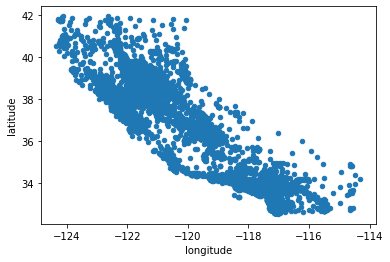

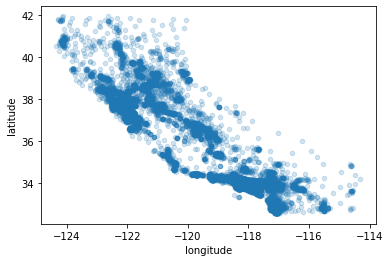

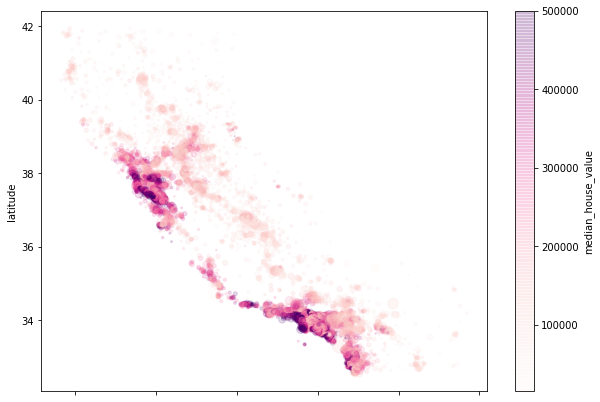

In [7]:
# Plotting
data.plot(kind="scatter", x="longitude", y="latitude")
data.plot(kind="scatter", x="longitude", y="latitude", alpha=.2)
data.plot(
    kind="scatter", x="longitude", y="latitude",
    alpha=.15, s=data["population"]/100, figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("RdPu"), colorbar=True
)
plt.savefig('./images/california.png',dpi=500)

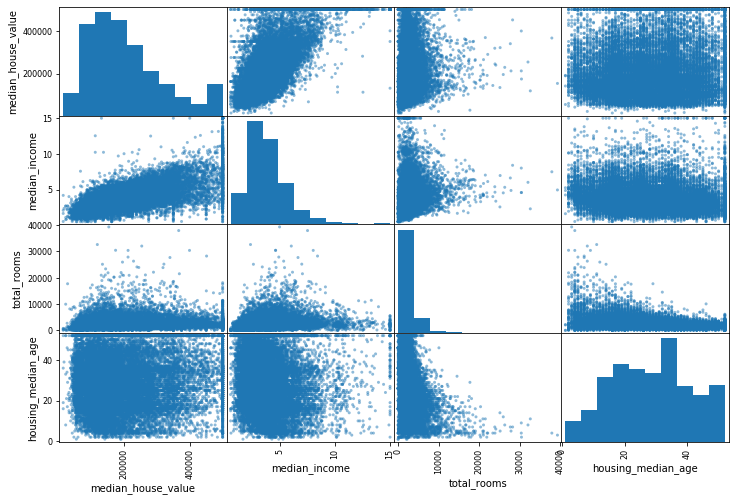

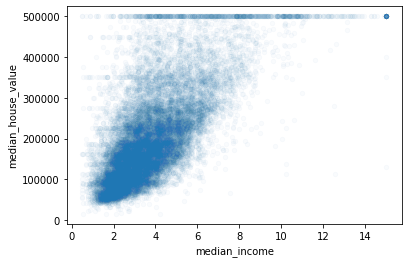

In [8]:
# Correlation (Pearson)
data.corr()

attr = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(data[attr], figsize=(12,8))
data.plot(kind="scatter", x="median_income", y="median_house_value", alpha=.025)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000233C04BADD8>,
      dtype=object)

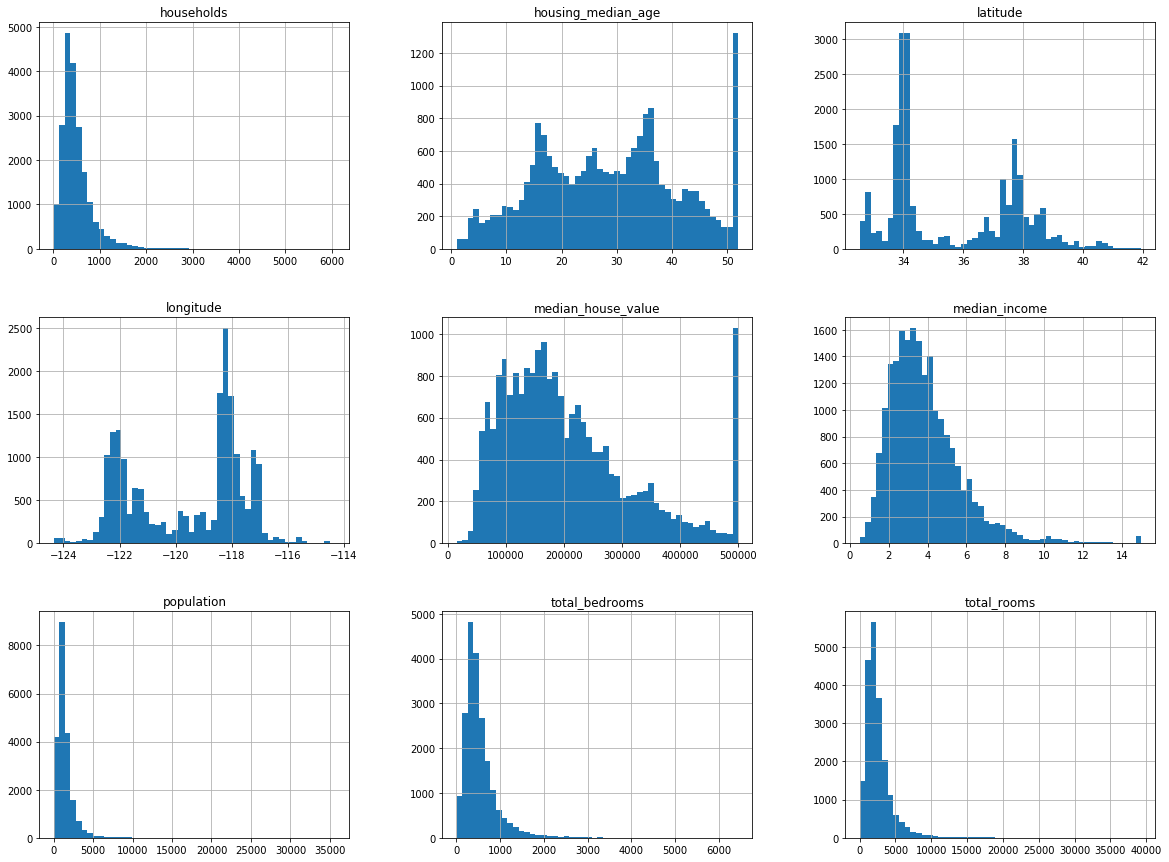

In [10]:
# Get some basic statistics and plots
data.describe()
data.hist(bins=50, figsize=(20, 15))
#plt.show()
#Salva al quitar el plt.show
# plt.savefig('./images/scikit04.png',dpi=500)